# 주어진 데이터 


1.   가스 데이터 (주요 열 : 도로명, 가스사용량 )
2.   전기 데이터 (주요 열 : 도로명, 전기사용량 )
3.   주소 별 위도 경도 (주요 열 : 도로명, 위도, 경도 )
4.   주소 별 면적 (주요 열 : 도로명, 면적 )




# 목표

1.   데이터 전처리 (데이터 조인, 결측치 제거 등)
2.   시각화
3.   최종 데이터 추출

In [178]:
# 데이터 불러오기
import pandas as pd

gas_data = pd.read_excel('가스데이터.xlsx').loc[:,['도로명대지위치','사용년월','사용량(KWh)']].dropna(axis=0)
area_data = pd.read_excel('면적.xlsx').loc[:,['도로명주소','면적']].dropna(axis=0)
location_data = pd.read_excel('위도경도.xls').loc[:,['도로명주소','위도','경도']].dropna(axis=0).drop_duplicates()
electric_data = pd.read_excel('전기데이터.xlsx').loc[:,['도로명대지위치','사용년월','사용량(KWh)']].dropna(axis=0)

print(gas_data.columns)
print(area_data.columns)
print(location_data.columns)
print(electric_data.columns)

Index(['도로명대지위치', '사용년월', '사용량(KWh)'], dtype='object')
Index(['도로명주소', '면적'], dtype='object')
Index(['도로명주소', '위도', '경도'], dtype='object')
Index(['도로명대지위치', '사용년월', '사용량(KWh)'], dtype='object')


In [180]:
# 데이터 조인을 위한 열 이름 수정

# 전기와 가스 사용량 구분을 위해 열 이름 수정
gas_data = gas_data.rename(columns={'사용량(KWh)':'가스사용량(KWh)'})
electric_data = electric_data.rename(columns={'사용량(KWh)':'전기사용량(KWh)'})

# 기준 열인 도로명 주소를 도로명대지위치 라는 이름으로 통일
area_data = area_data.rename(columns={'도로명주소':'도로명대지위치'})
location_data = location_data.rename(columns={'도로명주소':'도로명대지위치'})

print(gas_data.columns)
print(area_data.columns)
print(location_data.columns)
print(electric_data.columns)

Index(['도로명대지위치', '사용년월', '가스사용량(KWh)'], dtype='object')
Index(['도로명대지위치', '면적'], dtype='object')
Index(['도로명대지위치', '위도', '경도'], dtype='object')
Index(['도로명대지위치', '사용년월', '전기사용량(KWh)'], dtype='object')


    gas(GWh)     day
0   1.822447  201909
1   2.104668  201910
2   2.651391  201911
3   2.693092  201912
4   4.279873  202001
5   4.005609  202002
6   3.788742  202003
7   3.162646  202004
8   2.433098  202005
9   2.177334  202006
10  1.883364  202007
11  2.068307  202008
12  1.500682  202009
13  1.738360  202010
14  2.683083  202011
15  4.101170  202012
16  5.552341  202101
17  4.347727  202102
18  3.841064  202103
19  2.811665  202104
20  2.199068  202105
21  2.303908  202106
22  2.224329  202107
23  2.202541  202108


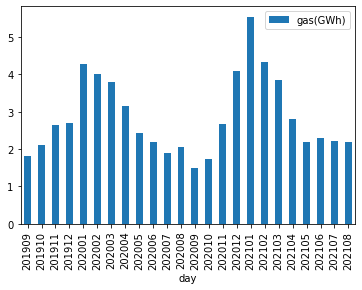

In [181]:
# 쌍암동 사용 기간별 가스에너지 사용량
import matplotlib.pyplot as plt

useday_gas = gas_data['사용년월'].unique()

sum_gas = [[gas_data.loc[(gas_data['사용년월']==day)]['가스사용량(KWh)'].sum()/1000000,str(day)] for day in useday_gas]
sum_gas = pd.DataFrame(sum_gas,columns=['gas(GWh)','day'])

print(sum_gas)

sum_gas.plot.bar(x='day',y='gas(GWh)')

    electric(GWh)     day
0        6.925738  201909
1        4.887998  201910
2        4.350784  201911
3        4.866934  201912
4        5.590839  202001
5        5.480693  202002
6        4.892840  202003
7        4.669743  202004
8        4.310292  202005
9        4.508113  202006
10       5.238081  202007
11       5.597496  202008
12       5.427670  202009
13       3.746693  202010
14       4.292303  202011
15       4.740969  202012
16       5.665052  202101
17       5.609815  202102
18       4.644342  202103
19       4.501298  202104
20       4.178335  202105
21       4.606217  202106
22       5.517874  202107
23       6.693111  202108


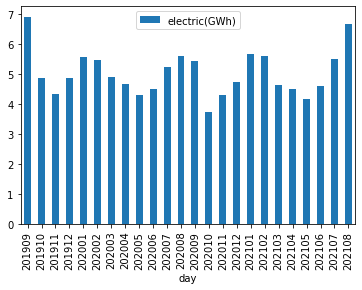

In [182]:
# 쌍암동 사용 기간별 전기에너지 사용량
import matplotlib.pyplot as plt

useday_electric = electric_data['사용년월'].unique()

sum_electric = [[electric_data.loc[(electric_data['사용년월']==day)]['전기사용량(KWh)'].sum()/1000000,str(day)] for day in useday_electric]
sum_electric= pd.DataFrame(sum_electric,columns=['electric(GWh)','day'])

print(sum_electric)

sum_electric.plot.bar(x='day',y='electric(GWh)')

In [192]:
# 데이터 조인

merge1 = pd.merge(gas_data, electric_data)
merge2 = pd.merge(merge1,location_data)
merge3 = pd.merge(merge2,area_data)

main_data = merge3.loc[:,['도로명대지위치','사용년월','면적','위도','경도','가스사용량(KWh)','전기사용량(KWh)']]

In [193]:
# 면적 당 가스, 전기 사용량 열 생성

main_data['가스사용량(KWh/m^3)'] = main_data['가스사용량(KWh)'] / main_data['면적']
main_data['전기사용량(KWh/m^3)'] = main_data['전기사용량(KWh)'] / main_data['면적']

print(main_data.columns)

Index(['도로명대지위치', '사용년월', '면적', '위도', '경도', '가스사용량(KWh)', '전기사용량(KWh)',
       '가스사용량(KWh/m^3)', '전기사용량(KWh/m^3)'],
      dtype='object')


In [203]:
# 면적 당 가스, 전기 사용에 따른 필요 나무 수 열 생성

# 나무는 1년에 5.6kg 탄소를 흡수 -> 한달에 5.6 / 12 (kg)
absorb_carbon_month = 5.6 / 12

# 가스 1KWh 당 0.09 m^3 
# 가스 1m^3 당 2.2 kg 탄소 배출
gasKWh_to_co2 = 0.09 * 2.2

# 전기 1KWh 당  0.42 kg 탄소 배출
electricKWh_to_co2 = 0.42

# 가스와 전기 KWh 을 m^3으로 바꾸는 계수
gasKWH_to_m3 = 0.09
electricKWH_to_m3 = 0.42

main_data['면적 당 가스사용에 따른 나무 수'] = main_data['가스사용량(KWh/m^3)'] * gasKWh_to_co2 / absorb_carbon_month
main_data['면적 당 전기사용에 따른 나무 수'] = main_data['전기사용량(KWh/m^3)'] * electricKWh_to_co2 / absorb_carbon_month
main_data['면적 당 총 필요 나무 수'] = main_data['면적 당 가스사용에 따른 나무 수'] + main_data['면적 당 전기사용에 따른 나무 수']

print(main_data.columns)

Index(['도로명대지위치', '사용년월', '면적', '위도', '경도', '가스사용량(KWh)', '전기사용량(KWh)',
       '가스사용량(KWh/m^3)', '전기사용량(KWh/m^3)', '가스사용에 따른 나무 수', '전기사용에 따른 나무 수',
       '총 필요 나무 수', '면적 당 가스사용에 따른 나무 수', '면적 당 전기사용에 따른 나무 수',
       '면적 당 총 필요 나무 수'],
      dtype='object')


In [204]:
# 최종 데이터

print(main_data)
print(main_data.columns)
print(main_data.info())

# 데이터 저장
# main_data.to_excel('data.xlsx')

                         도로명대지위치    사용년월  ...  면적 당 전기사용에 따른 나무 수  면적 당 총 필요 나무 수
0        광주광역시 광산구 첨단중앙로182번길 39  201909  ...            4.509358        4.521181
1        광주광역시 광산구 첨단중앙로182번길 39  201910  ...            3.630389        3.642212
2        광주광역시 광산구 첨단중앙로182번길 39  201911  ...            3.860837        3.871322
3        광주광역시 광산구 첨단중앙로182번길 39  201912  ...            4.713307        4.721114
4        광주광역시 광산구 첨단중앙로182번길 39  202001  ...            5.251571        5.260718
...                          ...     ...  ...                 ...             ...
3574     광주광역시 광산구 임방울대로801번길 35  202107  ...           27.556294       32.353278
3575     광주광역시 광산구 임방울대로801번길 35  202108  ...           32.536923       38.577168
3576  광주광역시 광산구 임방울대로825번길 22-84  202106  ...            0.445055        2.510919
3577  광주광역시 광산구 임방울대로825번길 22-84  202107  ...            0.442850        1.856241
3578  광주광역시 광산구 임방울대로825번길 22-84  202108  ...            0.431244        1.697576

[3579 rows x 15